<a href="https://colab.research.google.com/github/andrey-gl/study2020/blob/master/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Точечное оценивание

Пусть $\mathbf{X} = (X_1, . . . , X_n)$ - выборка объёма $n$ из распределения $\mathcal{F}_\theta$, которая известным образом зависит от некоторого параметра $\theta \in \Theta$.

**Определение.** Статистикой называется произвольная борелевская функция $\theta^* = \theta^*(X_1, . . . , X_n)$ от элементов выборки.

Статистики бывают:
1. Несмещенной, если $E\theta^* = \theta$;
2. Асимптотически несмещенными, если $E\theta^* \stackrel{{\sf P}}{\longrightarrow} \theta$ при $n\rightarrow \infty$;
3. Состоятельной, если для любого $\theta \in \Theta$: $\theta^* \stackrel{{\sf P}}{\longrightarrow} \theta$ при $n\rightarrow \infty$.

**Метод моментов.** Выберем некоторую функцию $g(y)$ такую, чтоы существовал момент $E(g(X_1)) = h(\theta)$ и функция $h$ была обратима в области $\Theta$. Тогда статистика
$$\theta^* = h^{-1}(\sum_{i = 1}^ng(X_i))$$
назвается оценкой метода моментов.

**Теорема.** Пусть $h^{-1}$ - непрерына. Тогда оценка $\theta^*$ - состоятельна.

**Метод максимального правдоподобия.** Для самостоятельного изучения.

# Построение доверительных интервалов

Пусть $\mathbf{X} = (X_1, . . . , X_n)$ - выборка объёма $n$ из распределения $\mathcal{F}_\theta$ с параметром $\theta \in \Theta$.

**Определение.** Пусть $0 < ε < 1$. Интервал со случайными концами $(\theta−, \theta+) = (\theta^−(\mathbf{X}, ε), \theta^+(\mathbf{X}, ε))$ называется доверительным интервалом для параметра $\theta$ уровня доверия $1−ε$, если для любого $\theta \in \Theta$:
$$P(\theta^− < \theta < \theta^+) ⩾ 1 − ε.$$

**Определение.** Пусть $0 < ε < 1$. Интервал со случайными концами $(\theta−, \theta+) = (\theta^−(\mathbf{X}, ε), \theta^+(\mathbf{X}, ε))$ называется асимптотическим доверительным интервалом для параметра $\theta$ уровня доверия $1−ε$, если для любого $\theta \in \Theta$:
$$lim_{n\rightarrow\infty}inf P(\theta^− < \theta < \theta^+) ⩾ 1 − ε.$$

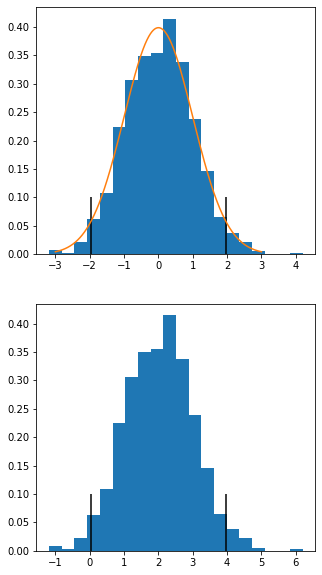

In [28]:
#Построение точных доверительных интервалов


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math


N = 100
M = 1000
xs = 0.2
mu = 2
sigma = 10

a1 = np.array([])
a2 = np.array([])

for _ in range(M):
    x = np.random.normal(mu, sigma, N)
    a1 = np.append(a1, (N**0.5)*(np.mean(x) - mu)/sigma)
    a2 = np.append(a2, (np.mean(x)))


fig = plt.figure(figsize=(5, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.hist(a1, bins = 20, density=True)
b1 = np.linspace(-3, 3, 1000)
ax1.plot(b1, norm.pdf(b1))
ax1.vlines(norm.ppf(1-0.025), 0, 0.1)
ax1.vlines(-norm.ppf(1-0.025), 0, 0.1)

ax2.hist(a2, bins = 20, density=True)
ax2.vlines(np.mean(b2)-(sigma*norm.ppf(1-0.025))/(N**0.5), 0, 0.1)
ax2.vlines(np.mean(b2)+(sigma*norm.ppf(1-0.025))/(N**0.5), 0, 0.1)

plt.show()

In [ ]:
# Построить доверительный асимптотический интервал

# Идея статистической проверки гипотез

**Пример**. Имеется нормальное распределение с параметрами $\mu = 20$ и $\sigma = 4$ и данные объямк $n = 64$. Известно, что среднее данных составило 18.5. Требуется ответить на вопрос: является ли данный набор данных выборкой из данного нормального распределения.

Гипотеза H0 - является
Гипотеза H1 - не является


#Работа с данными. Примеры задач из реального сектора.

Пример учебный - определение подлинности швейцарских купюр. Данные - это различные размеры, снятие с набора купюр, половина из которых - настоящие, друга - фальшивые. 

In [32]:
import pandas as pd

df = pd.read_csv('sample_data/swiss_bank_notes.csv', index_col=0)

df.head()

,Status,Length,Left,Right,Bottom,Top,Diagonal
1,genuine,214.8,131.0,131.1,9.0,9.7,141.0
2,genuine,214.6,129.7,129.7,8.1,9.5,141.7
3,genuine,214.8,129.7,129.7,8.7,9.6,142.2
4,genuine,214.8,129.7,129.6,7.5,10.4,142.0
5,genuine,215.0,129.6,129.7,10.4,7.7,141.8


In [37]:
print(df.shape)
print(len(df))
print(df.dtypes)
df.describe()

(200, 7)
200
Status       object
Length      float64
Left        float64
Right       float64
Bottom      float64
Top         float64
Diagonal    float64
dtype: object


,Length,Left,Right,Bottom,Top,Diagonal
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,214.896000,130.121500,129.956500,9.417500,10.650500,140.483500
std,0.376554,0.361026,0.404072,1.444603,0.802947,1.152266
min,213.800000,129.000000,129.000000,7.200000,7.700000,137.800000
25%,214.600000,129.900000,129.700000,8.200000,10.100000,139.500000
50%,214.900000,130.200000,130.000000,9.100000,10.600000,140.450000
75%,215.100000,130.400000,130.225000,10.600000,11.200000,141.500000
max,216.300000,131.000000,131.100000,12.700000,12.300000,142.400000


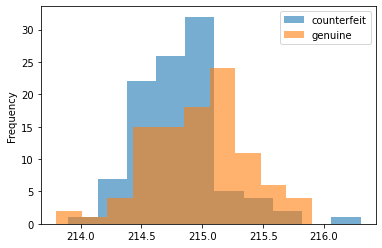

In [42]:
df.groupby('Status')['Length'].plot.hist(alpha=0.6)
plt.legend();

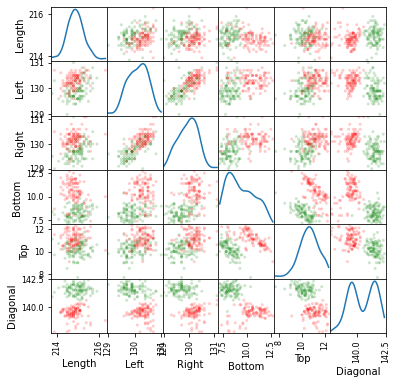

In [43]:
from pandas.plotting import scatter_matrix
colors = {'genuine': 'green', 'counterfeit': 'red'}
scatter_matrix(df,
               # размер картинки
               figsize=(6, 6),
               # плотность вместо гистограммы на диагонали
               diagonal='kde',
               # цвета классов
               c=df['Status'].replace(colors),
               # степень прозрачности точек
               alpha=0.2,
              );

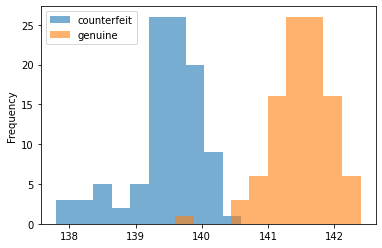

In [44]:
df.groupby('Status')['Diagonal'].plot.hist(alpha=0.6)
plt.legend(loc='upper left')

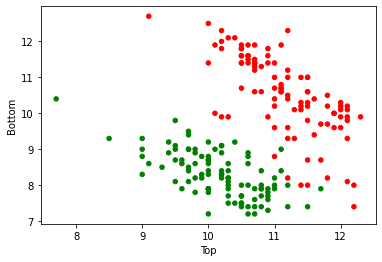

In [46]:
df.plot.scatter(x='Top', y='Bottom', c=df['Status'].replace(colors))
plt.show()

Примеры задач, решаемые статистическими методами:
1. Задачи проверки гипотез о соответствии выборки конкретному распределению.
2. Проверки гипотез о том, что выборки получены из разных распределений. 
3. Задачи кластеризации и классификации: отнесение данных к различным кластерам и классам. 
4. Задачи факторизации: определение факторов, позволяющих разграничить данные и отнести их к разным распределениям.
5. Задачи, связанные с зависимости в данных. 
